# Dados e Aprendizagem Automática
### Part IV

## **Logistic Regression using Titanic Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

*Load the CSV - Titanic train*

In [3]:
train = pd.read_csv("titanic_train.csv")

**EDA**

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Missing Data**

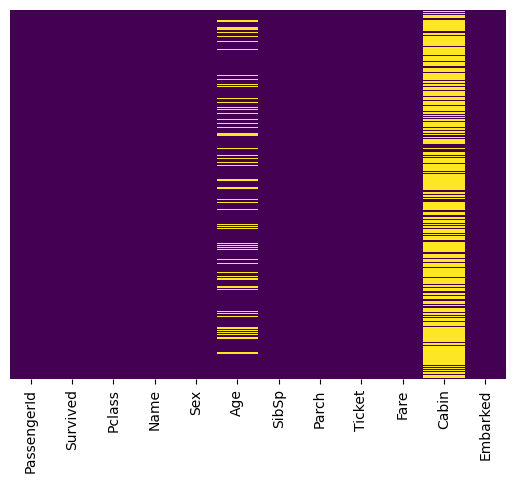

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

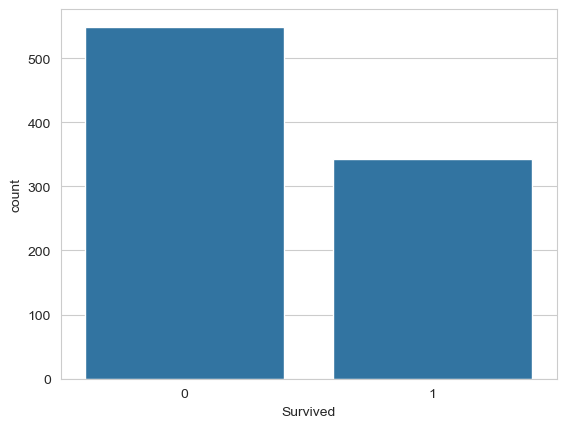

In [5]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", data=train)

<Axes: xlabel='Survived', ylabel='count'>

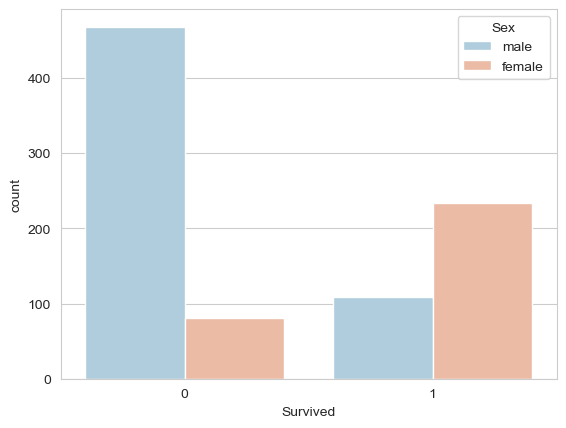

In [6]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Sex",data=train,palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

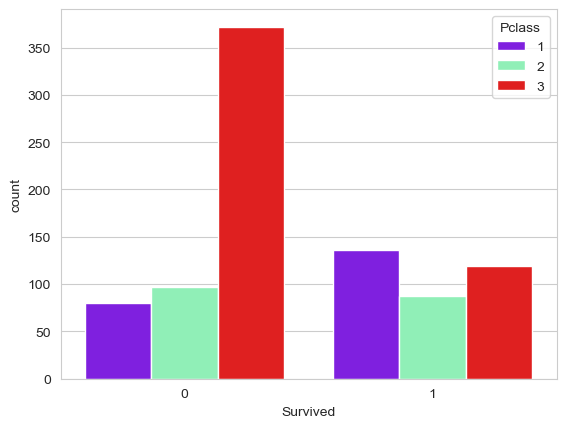

In [7]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Pclass",data=train,palette="rainbow")

<Axes: xlabel='Age', ylabel='Count'>

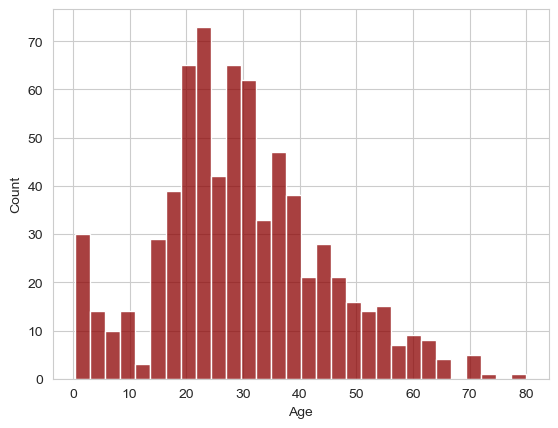

In [8]:
sns.histplot(train["Age"].dropna(),kde=False,color="darkred",bins=30)

<Axes: >

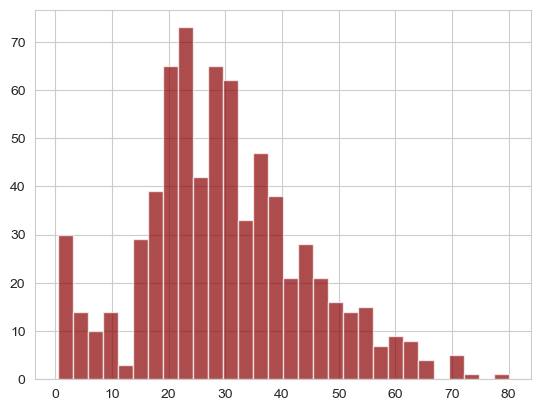

In [9]:
train["Age"].hist(,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

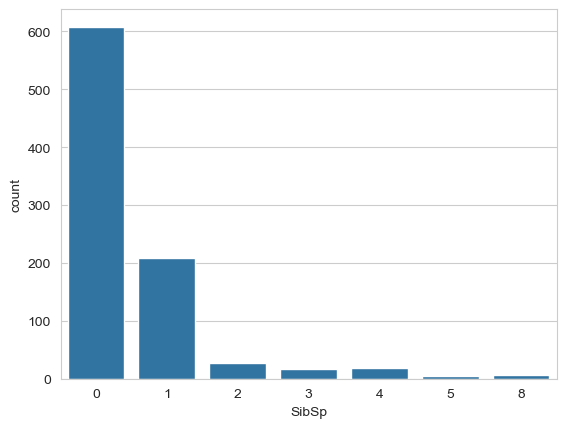

In [10]:
sns.countplot(x="SibSp",data=train)

<Axes: >

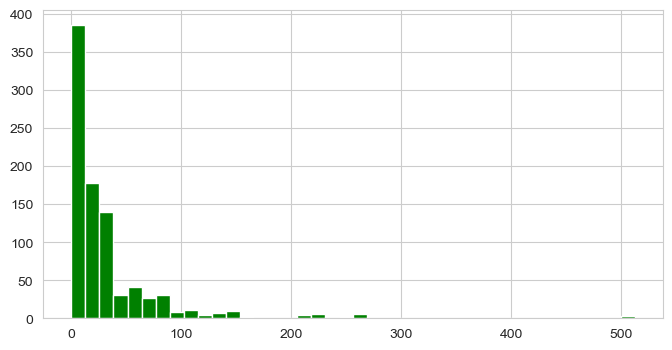

In [11]:
train["Fare"].hist(color='green',bins=40,figsize=(8,4))

**Data Cleaning**

<Axes: xlabel='Pclass', ylabel='Age'>

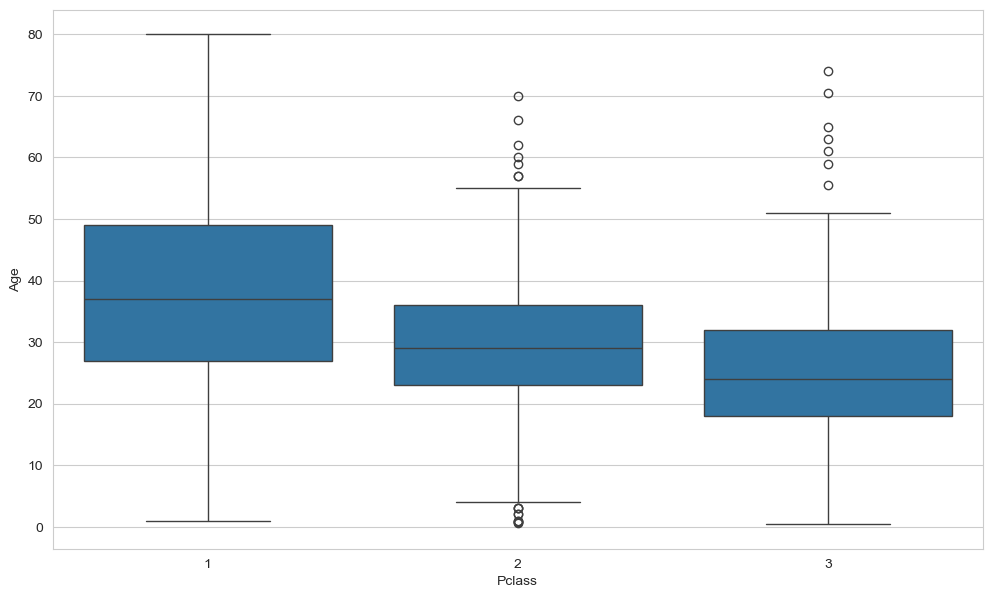

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Pclass", y="Age", data-train)

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [11]:
train['Age'] = train[["Age","Pclass"]].apply(impute_age,axis=1)

/tmp/ipykernel_9526/2216940440.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_9526/2216940440.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

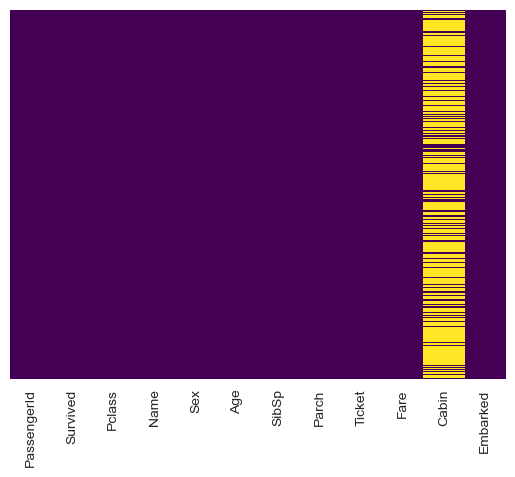

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop the <code>Cabin</code> column and the row in <code>Embarked</code> that is *NaN*:

In [12]:
train.drop("Cabin",axis=1,inplace=True)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Converting Categorical Features**

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [17]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [18]:
train = pd.concat([train,sex,embark],axis=1)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


**Logistic Regression Model**

In [20]:
from sklearn.model_selection import train_test_split
X = train.drop('Survived',axis=1)
y = train["Survived"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X,y,
                                                    test_size=0.30, 
                                                    random_state=101)

<Axes: xlabel='Survived', ylabel='count'>

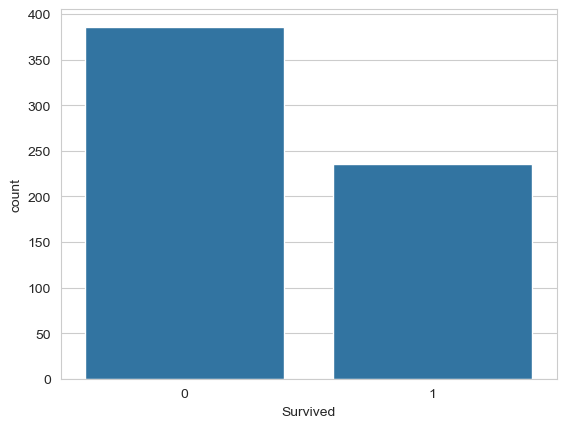

In [26]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", data = pd.DataFrame(y_train,columns=['Survived']) )

<Axes: xlabel='Survived', ylabel='count'>

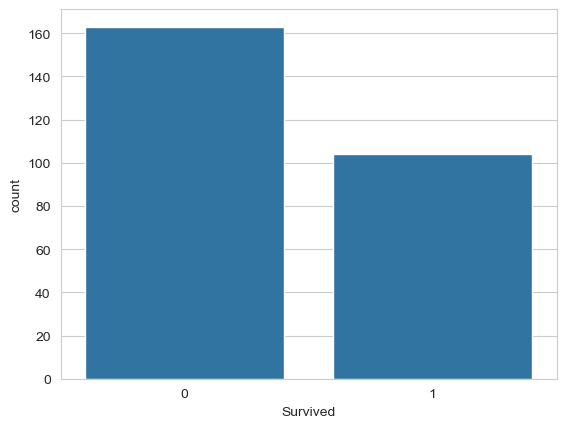

In [27]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", data = pd.DataFrame(y_test,columns=['Survived']) )

<code>sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)</code>

LogisticRegression' **solvers**:

- Small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
- Multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss
- ‘liblinear’ is limited to one-versus-rest schemes.

Supported **penalties** by solver:

- ‘newton-cg’ - [‘l2’, ‘none’]

- ‘lbfgs’ - [‘l2’, ‘none’]

- ‘liblinear’ - [‘l1’, ‘l2’]

- ‘sag’ - [‘l2’, ‘none’]

- ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

In [22]:
from sklearn.linear_model import LogisticRegression

**logmodel1 - LogisticRegression(random_state=2022, solver='newton-cg')**

In [23]:
starttime = time.process_time()

logmodel1 = LogisticRegression(random_state=2022, solver="newton-cg")
print(logmodel1)
logmodel1.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022, solver='newton-cg')
Time spent: 0.0481973 seconds


In [24]:
predictions1 = logmodel1.predict(X_test)

**logmodel2 - LogisticRegression(random_state=2022, solver='lbfgs')**

In [25]:
starttime = time.process_time()

logmodel2 = LogisticRegression(random_state=2022, solver="lbfgs",max_iter=800)
print(logmodel2)
logmodel2.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(max_iter=800, random_state=2022)
Time spent: 0.17128639999999962 seconds


In [27]:
predictions2 = logmodel2.predict(X_test)

**logmodel3 - LogisticRegression(random_state=2022, solver='liblinear')**

In [28]:
starttime = time.process_time()

logmodel3 = LogisticRegression(random_state=2022, solver="liblinear")
print(logmodel3)
logmodel3.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022, solver='liblinear')
Time spent: 0.016163099999999986 seconds


In [30]:
predictions3 = logmodel3.predict(X_test)

**Evaluation**

In [31]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [32]:
print("With 'newton-cg': \n", classification_report(y_test,predictions1))
print("With 'lbfgs': \n", classification_report(y_test,predictions2))
print("With 'liblinear': \n", classification_report(y_test,predictions3))

With 'newton-cg': 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

With 'lbfgs': 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

With 'liblinear': 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg      

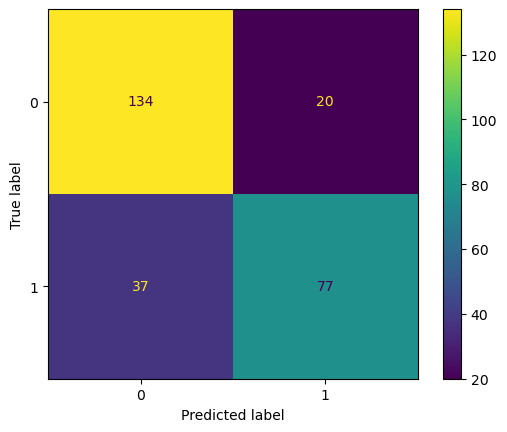

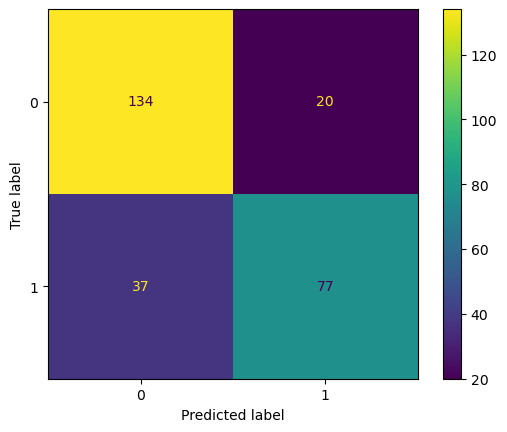

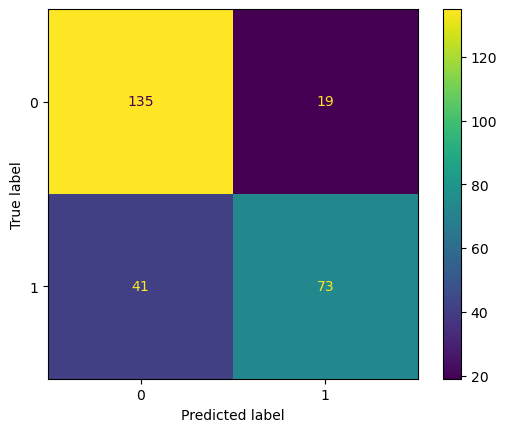

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,predictions1)
ConfusionMatrixDisplay.from_predictions(y_test,predictions2)
ConfusionMatrixDisplay.from_predictions(y_test,predictions3)
plt.show()

Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

In [37]:
test = pd.read_csv("titanic_test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
